# **Introduction**

Team members: Yilin Guo, Yihan Wang

We consumed a lot of food everyday. However, we may not fully know them! Food has multiple facts, including brands, categories, place of origin, nutritional ingredients, etc. We hope to learn about foods using scientific methods, for example, classify them according to different criteria or predicting their nutrition scores. We will explore the "Open Food Facts" dataset from kaggle (https://www.kaggle.com/datasets/openfoodfacts/world-food-facts) to find out some interesting facts. We will focus on the relationship between nutrition factors and geographic factors & food scores.

**Guide to upload files: Please upload all files(files start with ne_10_m_admin_countries) to colab before running in order to see the world map**

Before Start

In [ ]:
!pip install pandas==1.1.5

     |████████████████████████████████| 9.5 MB 5.2 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from google.colab import drive

# **Part 1: Data Downloading and Preprocessing**

# **1.1** Data Downloading

We are using one CSV for this homework, FoodFacts.csv from [this Kaggle dataset](https://www.kaggle.com/openfoodfacts/world-food-facts).

Load FoodFacts.csv as food_facts_df.

In [ ]:
!pip install kaggle

Go to the Kaggle link and create an account, go to Account, click on Create New API Token to get the API key in the form of a json file kaggle.json! Click on the folder button on the left panel, then upload the kaggle.json file to content!

In [ ]:
# Create the kaggle directory and read the uploaded kaggle.json file
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d openfoodfacts/world-food-facts

 85% 92.0M/109M [00:00<00:00, 208MB/s]
100% 109M/109M [00:00<00:00, 196MB/s] 


In [ ]:
!unzip /content/world-food-facts.zip

Archive:  /content/world-food-facts.zip
  inflating: en.openfoodfacts.org.products.tsv  


In [ ]:
# import .tsv file as dataframe food_facts_df
food_facts_df = pd.read_csv("en.openfoodfacts.org.products.tsv", sep="\t")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
food_facts_df.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
food_facts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(107), object(56)
memory usage: 442.8+ MB


There are 163 columns in the table. To extract valuable information, we are going to analyze and preprocess data in the next few steps. 

# **1.2** Preprocessing

It is easy to find that there are many empty entries in table `food_facts_df`. We are going to find out the percentage of missing values in each column first.

In [ ]:
# display the percentage of null values for each column
percent_missing = food_facts_df.isnull().sum() * 100 / len(food_facts_df)
percent_missing = percent_missing.sort_values()
pd.set_option('display.max_rows', None)
print(percent_missing)
pd.set_option('display.max_rows', 10)

last_modified_t                                 0.000000
last_modified_datetime                          0.000000
creator                                         0.000843
created_t                                       0.000843
created_datetime                                0.002809
code                                            0.007303
url                                             0.007303
states                                          0.014606
states_en                                       0.014606
states_tags                                     0.014606
countries_en                                    0.077241
countries_tags                                  0.077241
countries                                       0.077241
product_name                                    4.918728
brands                                          8.159494
brands_tags                                     8.165111
energy_100g                                    17.038034
proteins_100g                  

Drop columns with too many null values (percentage over 95%). 

In [ ]:
# set the threshold to 95%
perc = 0.95
# filter out columns with non-null values less then the given percentage
min_count =  int((1-perc)*food_facts_df.shape[0] + 1)
food_facts_df = food_facts_df.dropna(axis=1, thresh=min_count)

In [ ]:
food_facts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Data columns (total 75 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   code                                     356001 non-null  object 
 1   url                                      356001 non-null  object 
 2   creator                                  356024 non-null  object 
 3   created_t                                356024 non-null  object 
 4   created_datetime                         356017 non-null  object 
 5   last_modified_t                          356027 non-null  object 
 6   last_modified_datetime                   356027 non-null  object 
 7   product_name                             338515 non-null  object 
 8   generic_name                             57714 non-null   object 
 9   quantity                                 119285 non-null  object 
 10  packaging                       

The following line can be used to see some non-empty entries of the given column (By replacing 'XXX' with the column name need to explore).

In [ ]:
# display full columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
# replace the attributes here to read the specified column contents
print(food_facts_df[~food_facts_df['states_en'].isnull()][['states_en']])

                                                                                                                                                                                                                                                                                                               states_en
0                     To be completed,Nutrition facts to be completed,Ingredients to be completed,Expiration date to be completed,Characteristics to be completed,Categories to be completed,Brands completed,Packaging to be completed,Quantity completed,Product name completed,Photos to be validated,Photos uploaded
1       To be completed,Nutrition facts completed,Ingredients completed,Expiration date to be completed,Packaging-code-to-be-completed,Characteristics to be completed,Categories to be completed,Brands to be completed,Packaging to be completed,Quantity to be completed,Product name completed,Photos to be uploaded
2             To be completed,Nutrition facts completed,Ingre

Next, we further drop some columns that is useless.

In our project, we do not need columns `code`, `url`, `creator`, `created_t`, `created_datetime`, `last_modified_t`, `last_modified_datetime`, `first_packaging_code_geo`, `image_url`, `image_small_url`.

Furthermore, some columns have silimar information, for example, `categories` & `categories_tags` & `categories_en` all stands for category info. `XXX` is the raw data, `XXX_tags` is the formatted data, `XXX_en` is the formatted data in English. Therefore, for such a set of columns, we reserve one column with the highest priority in order of priority `XXX_en` > `XXX_tag` > `XXX`. 

In [ ]:
# drop useless columns
food_facts_df = food_facts_df.drop(columns=['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'first_packaging_code_geo', 'image_url', 'image_small_url'])
food_facts_df = food_facts_df.drop(columns=['packaging', 'brands', 'categories', 'categories_tags', 'origins', 'manufacturing_places', 'labels', 'labels_tags', 'emb_codes', 'countries', 'countries_tags', 'traces', 'traces_tags', 'additives', 'additives_tags', 'states', 'states_tags', 'main_category'])

For columns showing nutritional value ('XXX_100g'), `NaN` means the product does not have this kind of nutrition. Therefore, we can replace `NaN` values with zeros.

In [ ]:
# extract columns name ends with _100g
nutrition_columns = [col for col in food_facts_df.columns if '_100g' in col]
# two columns ends with _100g are not nutrition factors, but scores
score_columns = ['nutrition-score-fr_100g', 'nutrition-score-uk_100g']
nutrition_columns = list(set(nutrition_columns) - set(score_columns))
# replace nan nutrition values with 0
food_facts_df[nutrition_columns] = food_facts_df[nutrition_columns].fillna(0)

Drop rows without `product_name`.

In [ ]:
# drop rows with product_name = null
food_facts_df = food_facts_df[~food_facts_df['product_name'].isnull()]
food_facts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338515 entries, 0 to 356026
Data columns (total 47 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   product_name                             338515 non-null  object 
 1   generic_name                             57600 non-null   object 
 2   quantity                                 117875 non-null  object 
 3   packaging_tags                           89523 non-null   object 
 4   brands_tags                              324622 non-null  object 
 5   categories_en                            102163 non-null  object 
 6   origins_tags                             24919 non-null   object 
 7   manufacturing_places_tags                41846 non-null   object 
 8   labels_en                                58827 non-null   object 
 9   emb_codes_tags                           32194 non-null   object 
 10  cities_tags                     

In [ ]:
# show nutrition factors
print(len(nutrition_columns))
print(nutrition_columns)

18
['vitamin-c_100g', 'cholesterol_100g', 'fiber_100g', 'vitamin-a_100g', 'trans-fat_100g', 'proteins_100g', 'sodium_100g', 'monounsaturated-fat_100g', 'fat_100g', 'energy_100g', 'saturated-fat_100g', 'calcium_100g', 'polyunsaturated-fat_100g', 'salt_100g', 'iron_100g', 'sugars_100g', 'carbohydrates_100g', 'potassium_100g']


Now we have preprocessed the data and got a table with 46 columns, where 18 columns are nutrition factors.

Next we are going to further explore the data.

# **1.3** EDA and Data Wrangling

Exploratory Data Analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

# **1.3.0** Statistics of Nutrition Factors

There are certain numeric features of interest to us that we want to examine sample statistics for.

Compute simple statistics - specifically the mean, standard deviation, max, zero percentage - for each of the nutrition factors.

In [ ]:
# calculate statistics value
means = food_facts_df[nutrition_columns].mean()
stdevs = food_facts_df[nutrition_columns].std()
maxes = food_facts_df[nutrition_columns].max()
zero_perc = (food_facts_df[nutrition_columns].eq(0).sum(axis=0)/food_facts_df[nutrition_columns].count(axis=0) * 100)
# integrate into a dataframe
statistics_df = pd.DataFrame()
statistics_df['mean'] = means
statistics_df['std'] = stdevs
statistics_df['max'] = maxes
statistics_df['zero_perc'] = zero_perc
statistics_df

,mean,std,max,zero_perc
cholesterol_100g,0.008540,2.338162e-01,9.523800e+01,83.859799
saturated-fat_100g,3.914249,7.304074e+00,5.500000e+02,44.709688
monounsaturated-fat_100g,0.709790,5.092479e+00,1.000000e+02,94.917212
iron_100g,0.001574,1.396121e-01,5.000000e+01,71.090794
fiber_100g,250561.375628,1.457806e+08,8.481815e+10,57.187126
...,...,...,...,...
vitamin-a_100g,0.000162,4.671247e-02,2.670000e+01,82.573298
carbohydrates_100g,46306.263821,2.692698e+07,1.566667e+10,25.417781
energy_100g,969.811675,9.415489e+02,2.311990e+05,16.523049
sugars_100g,12.774948,2.077232e+01,3.520000e+03,30.196889


Show the most readily available nutrients (exists in most products)

In [ ]:
statistics_df[['zero_perc']].idxmin().item()

'energy_100g'

`Energy` exists in most foods.

# **1.3.1** Distribution of nutrition factors versus geographic factors



We found a set of columns (`origins_tags`, `manufacturing_places_tags`, `cities_tags`, `purchase_places`, `countries_en`) describe geographic factors of a product. 

In this subsection, we are going to explore these geographic factors and nutrition factors, which are exacted as a new table `geo_df`.

Entries of geographic factors columns are strings. Therefore, we first replace `NaN` with empty string.


In [ ]:
# use geo_df to represent information including geographic factors and nutrition factors
geo_df = food_facts_df.copy()
geo_columns = ['origins_tags', 'manufacturing_places_tags', 'cities_tags', 'purchase_places', 'countries_en']
geo_df = food_facts_df[['product_name'] + geo_columns + nutrition_columns]
# replace null geographic value with empty string
geo_df = geo_df.fillna('')

We first focus on countries (column `countries_en`) of each product, which is in format 'XX,XX'. 

Format entries into lists and then explode column `countries_en`.

In [ ]:
# split each list-like string into several columns for future processing
geo_df = geo_df.assign(countries_en=geo_df['countries_en'].str.split(',')).explode('countries_en')
len(geo_df['countries_en'].unique())

212

We found product comes from 212 different countries. There are too many (>2000) distinct attribute values for other categories like `cities`, of each group there are few samples. Therefore, we only focus on `countries` as geographic factor.

Following is the bar chart showing the distribution of number of products from one country versus country. Since there are too many countries, we only show the top 10 countries with most product in this table.

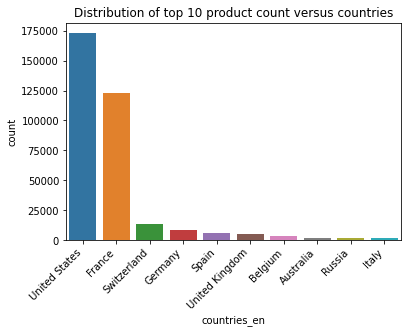

In [ ]:
# use countplot to visulaize how many products come from each country in our dataset
ax = sns.countplot(x="countries_en", data=geo_df, order = geo_df['countries_en'].value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax = ax.set(title="Distribution of top 10 product count versus countries")

We want to visualize the distribution of food source over countries by making a world heat map. We will first convert Country names to corresponding country codes and then merge the df with geo object to show them on the map.

In [ ]:
countries_df = geo_df.groupby(by=["countries_en"]).size()
country_count_df = countries_df.reset_index(name='counts').sort_values('counts')
country_count_df

,countries_en,counts
72,Isle of Man,1
110,Niger,1
83,Libya,1
179,fr:Bourgogne-aube-nogent-sur-seine,1
178,fr:Belgiqu,1
...,...,...
147,Spain,5530
55,Germany,8445
152,Switzerland,13477
50,France,123033


In [ ]:
pip install country_converter

In [ ]:
pip install geopandas

In [ ]:
# Loading shape file of the world map
import json
import country_converter as coco
from datetime import datetime, timedelta
import requests
import geopandas as gpd
import matplotlib.pyplot as plt
SHAPEFILE = '/content/ne_10m_admin_0_countries.shp'
loc_df = gpd.read_file(SHAPEFILE)[['ADMIN', 'ADM0_A3', 'geometry']]

# Rename columns.
loc_df.columns = ['country', 'country_code', 'geometry']
loc_df = loc_df.drop(loc_df.loc[loc_df['country'] == 'Antarctica'].index)

In [ ]:
# Extract names of countries and then convert them into country codes
iso3_codes = loc_df['country'].to_list()

# Convert to iso3_codes
iso2_codes_list = coco.convert(names=iso3_codes, to='ISO2', not_found='NULL')

# Add the list with iso2 codes to the dataframe
loc_df['iso2_code'] = iso2_codes_list

# There are some countries for which the converter could not find a country code. 
# We will drop these countries.
loc_df = loc_df.drop(loc_df.loc[loc_df['iso2_code'] == 'NULL'].index)


Dhekelia Sovereign Base Area not found in regex
US Naval Base Guantanamo Bay not found in regex
Siachen Glacier not found in regex
Baykonur Cosmodrome not found in regex
Akrotiri Sovereign Base Area not found in regex
Southern Patagonian Ice Field not found in regex
Bir Tawil not found in regex
Indian Ocean Territories not found in regex
Coral Sea Islands not found in regex
Spratly Islands not found in regex
Clipperton Island not found in regex
Ashmore and Cartier Islands not found in regex
Bajo Nuevo Bank (Petrel Is.) not found in regex
Serranilla Bank not found in regex
Scarborough Reef not found in regex


In [ ]:
country_count_df['countries_en']
c_iso3_codes = country_count_df['countries_en'].to_list()
c_iso2_codes_list = coco.convert(names=c_iso3_codes, to='ISO2', not_found='NULL')
country_count_df['iso2_code'] = c_iso2_codes_list

# We want to drop country names that we don't found corresponding codes
country_count_df = country_count_df.drop(country_count_df.loc[country_count_df['iso2_code'] == 'NULL'].index)
country_count_df

fr:Bourgogne-aube-nogent-sur-seine not found in regex
fr:Belgiqu not found in regex
fr:Angleterre not found in regex
fr:Alemania not found in regex
fr:Grande-bretagne not found in regex
Global-market not found in regex
Schweiz not found in regex
Republique-de-chine not found in regex
Other-العراق not found in regex
Other-turquie not found in regex
fr:Griekenland not found in regex
fr:Frankrijk not found in regex
fr:Marseille-5 not found in regex
ព្រះរាជាណាចក្រកម្ពុជា not found in regex
भारत not found in regex
المملكة-المتحدة not found in regex
العراق not found in regex
xx:Danemark not found in regex
Angleterre not found in regex
Ap not found in ISO2
nl:Schweiz not found in regex
fr:Irland not found in regex
nl:Frankreich not found in regex
nl:Belgien not found in regex
fr:Франция not found in regex
fr:Spanje not found in regex
fr:Scotland not found in regex
fr:Reino-unido not found in regex
fr:Mauricio not found in regex
nl:Deutschland not found in regex
Other-日本 not found in regex
Que

,countries_en,counts,iso2_code
72,Isle of Man,1,IM
110,Niger,1,NE
83,Libya,1,LY
62,Guinea-Bissau,1,GW
170,Virgin Islands of the United States,1,VI
...,...,...,...
147,Spain,5530,ES
55,Germany,8445,DE
152,Switzerland,13477,CH
50,France,123033,FR


In [ ]:
# Merge the original dataset with the number of food in countries on 'iso2_code'
merged_df = pd.merge(left=loc_df, right=country_count_df, how='left', left_on='iso2_code', right_on='iso2_code')
merged_df['counts'].fillna(0, inplace=True)

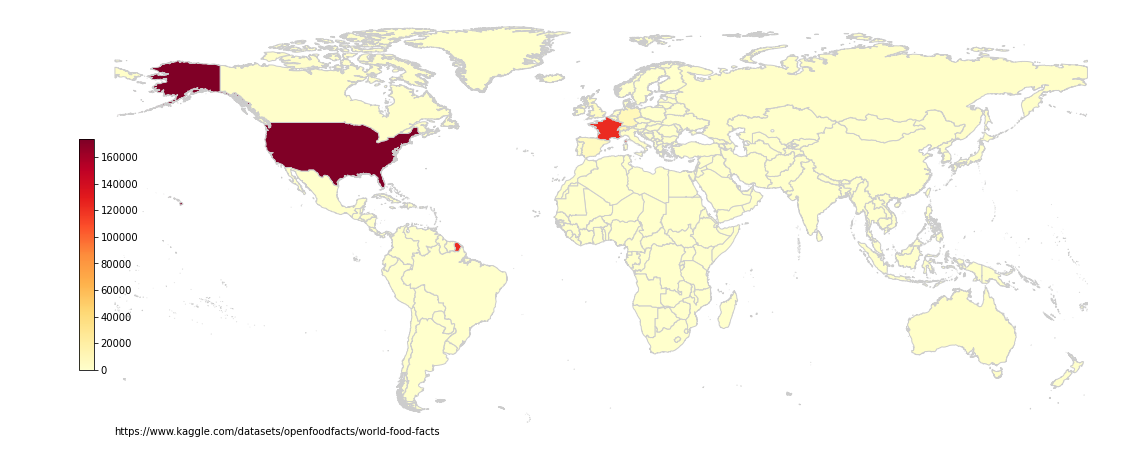

In [ ]:
# Plot the world heat map 
vmin = merged_df['counts'].min()
vmax = merged_df['counts'].max()
cmap = 'YlOrRd'
source = 'https://www.kaggle.com/datasets/openfoodfacts/world-food-facts'

fig, ax = plt.subplots(1, figsize=(20, 8))

# Remove the axis
ax.axis('off')
merged_df.plot(column='counts', ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)

ax.annotate(source, xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', 
            verticalalignment='bottom', fontsize=10)
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

# Empty array for the data range
sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

We found `United States` and `France` have significantly more product in our Map. Thus we are going to explore the nutrition distribution difference between these two countries.

We used mean value of nutrition columns to represent the average product nutrition of each country.

<!-- geopandas world map 
PCA
diet recommodation -->

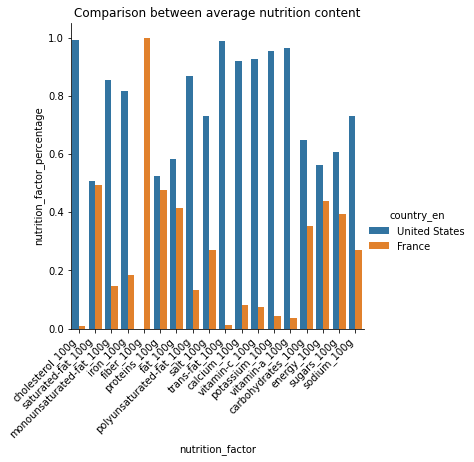

In [ ]:
# get average nutrition value for US and France separately
us_nutrition_mean = geo_df[geo_df["countries_en"] == "United States"][nutrition_columns].mean()
fr_nutrition_mean = geo_df[geo_df["countries_en"] == "France"][nutrition_columns].mean()
us_nutrition_mean_df = pd.DataFrame(us_nutrition_mean).reset_index().rename(columns={'index': 'nutrition_factor', 0: 'mean_value'})
us_nutrition_mean_df['country_en'] = 'United States'
fr_nutrition_mean_df = pd.DataFrame(fr_nutrition_mean).reset_index().rename(columns={'index': 'nutrition_factor', 0: 'mean_value'})
fr_nutrition_mean_df['country_en'] = 'France'
# integrate into one dataframe for visualization
cty_nutrition_mean_df = pd.concat([us_nutrition_mean_df, fr_nutrition_mean_df])
# prepare for normalization
sum_nutrition_value_df = cty_nutrition_mean_df.groupby(['nutrition_factor']).sum().reset_index().rename(columns={'mean_value': 'sum_value'})
cty_nutrition_mean_df = cty_nutrition_mean_df.merge(sum_nutrition_value_df, on='nutrition_factor')
# compare value according to value/(us_value + france_value) for each nutrition content
cty_nutrition_mean_df['nutrition_factor_percentage'] = cty_nutrition_mean_df['mean_value']/cty_nutrition_mean_df['sum_value']
# plot the figure
ax = sns.catplot(x='nutrition_factor', y='nutrition_factor_percentage', hue='country_en', data=cty_nutrition_mean_df, kind='bar')
ax.set_xticklabels(rotation=45, ha="right")
ax = ax.set(title="Comparison between average nutrition content")

It seems that all average nutrition value except for `fiber` of products from United States is higher than that from France.

# 1.3.2 Correlation of Feature Variables

With such an overwhelming number of features, we want to do bivariate analysis on every possible pair of features and check for the correlation between features since certain models (e.g. Linear Regression) won't work well if we have strong multicollinearity.

**Correlation Heatmap**

Next, create a correlation matrix using nutrition factors and call it `corr_matrix`. Using that, we can generate a correlation heatmap for these nutrition features. 

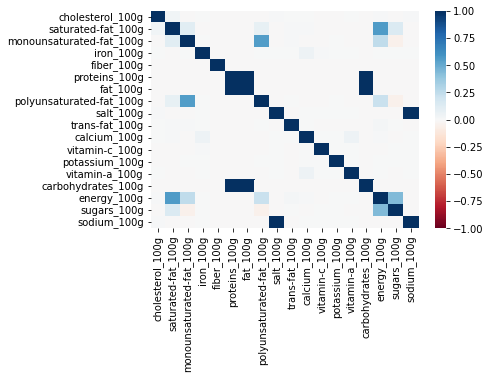

In [ ]:
# calculate the correlation matrix for nutrition factors
corr_matrix = food_facts_df[nutrition_columns].corr()
fig = sns.heatmap(corr_matrix, cmap='RdBu', vmin=-1, vmax=1, center=0)

We can figure out that there are some correlations between some nutrition factors. For example, `fat`, `carbohydrates` and `proteins` are highly correlated with each other.

# 1.3.3 Three major nutrients and low calorie diet
There are three macronutrients: proteins, carbohydrates, and fats. Your body also requires micronutrients (such as vitamins and minerals) in smaller amounts, but the macronutrients provide your body with calories (energy) and the building blocks of cellular growth, immune function, and overall repair. Therefore we analyze the three major nutrients in food.


To find the low calorie diet, we need to figure out what food is low in calories and high in nutrients. Based on the content of three major nutrients, we can simply divide it by energy amount. We need to use factors like proteins_100g/energy_100g, carbohydrates_100g/energy_100g, fats_100g/energy_100g to find nutrient-dense and low-calorie foods.

In [ ]:
food_df = food_facts_df.copy()
food_df = food_df.dropna( axis=0, subset=['energy_100g', 'proteins_100g'])
food_df = food_df[~food_df['energy_100g'].isin([0])]
food_df["proteins_energy"] = food_df['proteins_100g']/food_df['energy_100g']
food_df["fat_energy"] = food_df['fat_100g']/food_df['energy_100g']
food_df["carbohydrates_energy"] = food_df['carbohydrates_100g']/food_df['energy_100g']



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

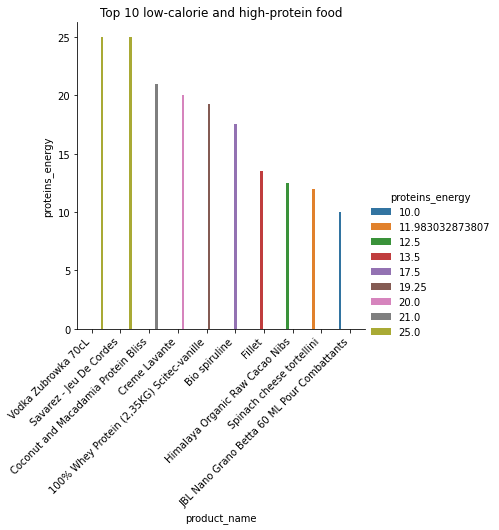

In [ ]:
food_df.sort_values(by="proteins_energy" , inplace=True, ascending=False)
food_df = food_df.head(10)
ax = sns.catplot(x='product_name', y='proteins_energy', hue='proteins_energy', data=food_df, kind='bar')
ax.set_xticklabels(rotation=45, ha="right")
ax = ax.set(title="Top 10 low-calorie and high-protein food")


In this way, we can also find low-calorie foods that are rich in some other certain nutrients, like vitamin C. This can guide people on what foods to eat to quickly replenish certain nutrients during weight loss. These factors are stored for the next ML part.

# **1.4** Feature Engineering

Feature engineering is the process of applying domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms.

# **1.4.1** Unsupervised Learning

For unsupervised learning, we only focus on 18 nutrition features, denoted as `nutrition_df`.

In [ ]:
nutrition_df = food_facts_df[nutrition_columns]
nutrition_df

,cholesterol_100g,saturated-fat_100g,monounsaturated-fat_100g,iron_100g,fiber_100g,proteins_100g,fat_100g,polyunsaturated-fat_100g,salt_100g,trans-fat_100g,calcium_100g,vitamin-c_100g,potassium_100g,vitamin-a_100g,carbohydrates_100g,energy_100g,sugars_100g,sodium_100g
0,0.000,0.00,0.0,0.00000,0.0,0.00,0.00,0.0,0.00000,0.0,0.000,0.0000,0.0,0.0,0.00,0.0,0.00,0.000
1,0.018,28.57,0.0,0.00129,3.6,3.57,28.57,0.0,0.00000,0.0,0.000,0.0214,0.0,0.0,64.29,2243.0,14.29,0.000
2,0.000,0.00,0.0,0.00129,7.1,17.86,17.86,0.0,0.63500,0.0,0.071,0.0000,0.0,0.0,60.71,1941.0,17.86,0.250
3,0.000,5.36,0.0,0.00514,7.1,17.86,57.14,0.0,1.22428,0.0,0.143,0.0000,0.0,0.0,17.86,2540.0,3.57,0.482
4,0.000,0.00,0.0,0.00000,5.7,8.57,1.43,0.0,0.00000,0.0,0.000,0.0000,0.0,0.0,77.14,1552.0,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356022,0.000,0.00,0.0,0.00000,0.0,0.00,0.00,0.0,0.00000,0.0,0.000,0.0000,0.0,0.0,0.00,0.0,0.00,0.000
356023,0.000,0.00,0.0,0.00000,0.0,0.00,0.00,0.0,0.00000,0.0,0.000,0.0000,0.0,0.0,0.00,0.0,0.00,0.000
356024,0.000,0.00,0.0,0.00000,0.0,0.00,0.00,0.0,0.00000,0.0,0.000,0.0000,0.0,0.0,0.00,0.0,0.00,0.000
356025,0.000,0.00,0.0,0.00000,0.0,0.00,0.00,0.0,0.00000,0.0,0.000,0.0000,0.0,0.0,0.00,0.0,0.00,0.000


We will first apply the K-means clustering algorithm on the original data to see its performance. The data is preprocessed that only nutrition features that looks like "xxx_100g" are kept. 

We first apply the elbow method to get the optimal number of clusters that we should use and we get the elbow at k = 2, this number of clusters may be too small for our purpose but we will apply it first to see the performance.

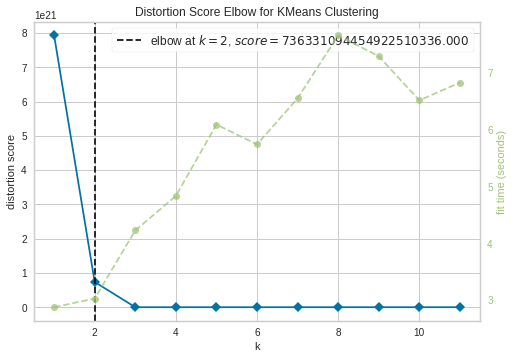

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(nutrition_df)
visualizer.show()

In [ ]:
nutrition_df.describe()

,cholesterol_100g,saturated-fat_100g,monounsaturated-fat_100g,iron_100g,fiber_100g,proteins_100g,fat_100g,polyunsaturated-fat_100g,salt_100g,trans-fat_100g,calcium_100g,vitamin-c_100g,potassium_100g,vitamin-a_100g,carbohydrates_100g,energy_100g,sugars_100g,sodium_100g
count,338515.000000,338515.000000,338515.000000,338515.000000,3.385150e+05,3.385150e+05,3.385150e+05,338515.000000,338515.000000,338515.000000,338515.000000,338515.000000,338515.000000,338515.000000,3.385150e+05,338515.000000,338515.000000,338515.000000
mean,0.008540,3.914249,0.709790,0.001574,2.505614e+05,4.628672e+04,4.629099e+04,0.431837,1.650884,0.031088,0.053100,0.009725,0.031088,0.000162,4.630626e+04,969.811675,12.774948,0.649953
std,0.233816,7.304074,5.092479,0.139612,1.457806e+08,2.692698e+07,2.692698e+07,3.259520,111.525012,1.002512,2.166408,1.442741,3.389319,0.046712,2.692698e+07,941.548950,20.772315,43.907484
min,0.000000,0.000000,0.000000,-0.000260,-6.700000e+00,-8.000000e+02,0.000000e+00,0.000000,0.000000,-3.570000,0.000000,-0.002100,0.000000,-0.000340,0.000000e+00,0.000000,-17.860000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,192.000000,0.000000,0.000000
50%,0.000000,0.400000,0.000000,0.000000,0.000000e+00,3.400000e+00,2.000000e+00,0.000000,0.254000,0.000000,0.000000,0.000000,0.000000,0.000000,1.200000e+01,854.000000,3.330000,0.100000
75%,0.000000,5.000000,0.000000,0.000590,2.400000e+00,8.890000e+00,1.600000e+01,0.000000,1.181100,0.000000,0.016000,0.000000,0.000000,0.000000,5.100000e+01,1598.000000,16.600000,0.465000
max,95.238000,550.000000,100.000000,50.000000,8.481815e+10,1.566667e+10,1.566667e+10,98.000000,64312.800000,369.000000,694.737000,716.981100,1870.370000,26.700000,1.566667e+10,231199.000000,3520.000000,25320.000000


In [ ]:
from collections import Counter
kmeans_ori = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(nutrition_df)
labels_ori = pd.DataFrame(kmeans_ori.labels_)
labeled_nutrition_df = nutrition_df
labeled_nutrition_df = pd.concat((labeled_nutrition_df,labels_ori), axis=1)
labeled_nutrition_df = labeled_nutrition_df.rename({0:'labels'},axis=1)

In [ ]:
labeled_nutrition_df.head()

,cholesterol_100g,saturated-fat_100g,monounsaturated-fat_100g,iron_100g,fiber_100g,proteins_100g,fat_100g,polyunsaturated-fat_100g,salt_100g,trans-fat_100g,calcium_100g,vitamin-c_100g,potassium_100g,vitamin-a_100g,carbohydrates_100g,energy_100g,sugars_100g,sodium_100g,labels
0,0.000,0.00,0.0,0.00000,0.0,0.00,0.00,0.0,0.00000,0.0,0.000,0.0000,0.0,0.0,0.00,0.0,0.00,0.000,0.0
1,0.018,28.57,0.0,0.00129,3.6,3.57,28.57,0.0,0.00000,0.0,0.000,0.0214,0.0,0.0,64.29,2243.0,14.29,0.000,0.0
2,0.000,0.00,0.0,0.00129,7.1,17.86,17.86,0.0,0.63500,0.0,0.071,0.0000,0.0,0.0,60.71,1941.0,17.86,0.250,0.0
3,0.000,5.36,0.0,0.00514,7.1,17.86,57.14,0.0,1.22428,0.0,0.143,0.0000,0.0,0.0,17.86,2540.0,3.57,0.482,0.0
4,0.000,0.00,0.0,0.00000,5.7,8.57,1.43,0.0,0.00000,0.0,0.000,0.0000,0.0,0.0,77.14,1552.0,0.00,0.000,0.0


In [ ]:
from collections import Counter
Counter(kmeans_ori.labels_)

Counter({0: 338514, 1: 1})

The nutrition_df has 18 features. We have 2 clusters of points in 18-dimensional space, which is hard to visualize. So we pick up two features to look at how the clusters separate.

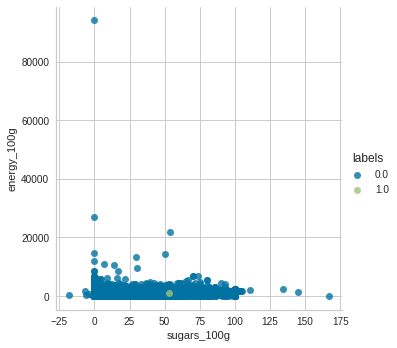

In [ ]:
import seaborn as sns
sns.lmplot(x='sugars_100g',y='energy_100g',data=labeled_nutrition_df,hue='labels',fit_reg=False)

From the counter and the graph we can see that K-Means Clustering didn't split data well with the original dataset - nutrition_df. We then want to apply PCA to reduce the dimension of the dataset to see if it helps with clustering.

# **1.4.1.1** PCA to Reduce Dimensionality

The goal of Principal Component Analysis is to reduce number of dimensions of our features.

**Initial PCA**

As a first step instantiate and fit PCA from scikit-learn on dataset `nutrition_df`.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# scaler initialize
scaler = StandardScaler()
# fit and transform with the original nutrition dataframe
nutrition_sc = scaler.fit_transform(nutrition_df)
pca = PCA().fit(nutrition_sc)

**Cumulative Explained Variance Ratios**

Create an array of explained variance ratios and store it into a variable called `explained_variance_ratios`. Also, calculate the cumulative explained variance ratios and store that into another variable called `cum_evr`.

In [ ]:
# Save the explained variance ratios into variable called "explained_variance_ratios"
explained_variance_ratios = pca.explained_variance_ratio_
# Save the CUMULATIVE explained variance ratios into variable called "cum_evr"
cum_evr = explained_variance_ratios.cumsum()

Now plot the cumulative `explained_variance_ratio` against the number of components to decide the number of components we should keep.

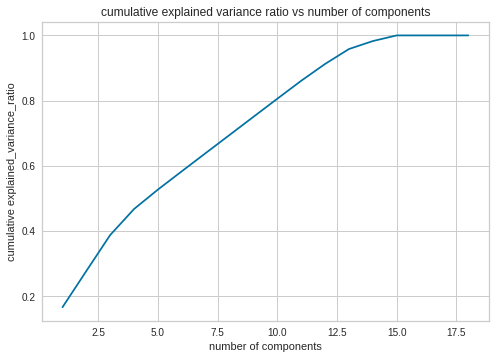

In [ ]:
# x axis start from 1
plt.plot(range(1, len(cum_evr)+1), cum_evr)
plt.xlabel("number of components")
plt.ylabel("cumulative explained_variance_ratio")
fig = plt.title("cumulative explained variance ratio vs number of components")

**Final PCA**

Using our results above to decide the number of components to keep, choose a number (n) that explains at least 80% of total variance in the dataset. Then re-fit and transform your PCA on the training set using the number of components we decided.

We decided to keep 10 components and save as `nutrition_pca`. 

In [ ]:
# fit and transform with n = 10 features
n = 10
nutrition_pca = PCA(n_components=n).fit_transform(nutrition_sc)

**Visualizing Top 2 Principal Components**

Just to visualize what's going on (separate from what we just did), use PCA once more but this time to reduce the number dimensions to 2 and plot all rows for each component.

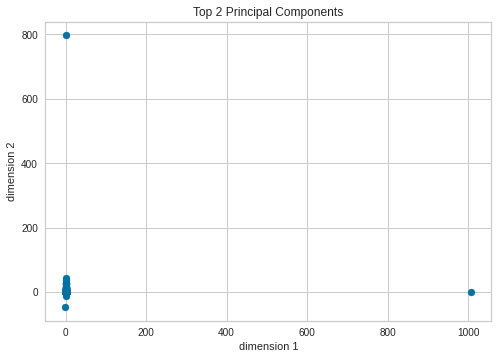

In [ ]:
# fit and transform with 2 features
nutrition_pca2 = PCA(n_components=2).fit_transform(nutrition_sc)
plt.scatter(nutrition_pca2[:, 0], nutrition_pca2[:, 1])
plt.xlabel("dimension 1")
plt.ylabel("dimension 2")
fig2 = plt.title("Top 2 Principal Components")

We will then use the pca data to apply the k-means clustering algorithm
In k_means, it is important to provide the numbers of the cluster that we want to form from the data. We will use the Elbow methods for finding the optimal number of clusters in the dataset.

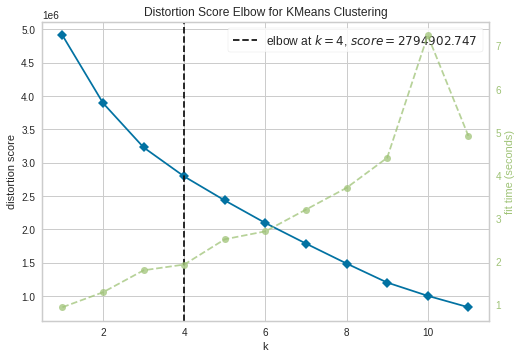

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(nutrition_pca)
visualizer.show()

In the above figure, the optimal number of clusters(k) is plotted against the distortion, the optimal number of k is a point where there is a bend in the curve and the optimal number of k is 4. We then build and fit the model to our data

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(nutrition_pca)
labels = pd.DataFrame(kmeans.labels_)
nutrition_pca_df = pd.DataFrame(nutrition_pca)
labeled_nutrition_pca = pd.concat((nutrition_pca_df,labels), axis=1)
labeled_nutrition_pca.columns = [*labeled_nutrition_pca.columns[:-1], 'labels']

We can now use counter to see how many data points are there in each clusters

In [ ]:
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 333827, 1: 1, 2: 1, 3: 4686})

We found that almost all the data are clustered in the same group therefore it is hard to extract useful Information. We will try to use other number of clusters to see if the result will differ.

In [ ]:
kmeans_6 = KMeans(n_clusters=6, init='k-means++', random_state=0).fit(nutrition_pca)

In [ ]:
from collections import Counter
Counter(kmeans_6.labels_)

Counter({0: 4650, 1: 222214, 2: 1, 3: 1, 4: 111648, 5: 1})

Still,the K-means Algorithm failed to classify the data and the reason could be that the variables are not strongly correlated and therefore not a good fit for K-Means.We may turn to supervised learning to see if we can predict the label of a food based on nutrition features.

# 1.4.2 Supervised Learning

The dataset provide **food standards agency nutrition score (FSA score)** based on uk standard (https://www.food.gov.uk/topic/nutrition) and france standard for each product seperately. 

For regression model, we will work with various models and attempt to predict the `nutrition-score-uk_100g` and `nutrition-score-fr_100g` according to nutrition factors.

And we regard those products with high uk nutrition score (greater than average score) as valuable. For logistic model, we will work with models to predict if a food product with high nutritional value based on its nutrition factors.

# **1.4.2.0**  Preprocessing: Data cleaning & Creating Logistic Target Variable - whether nutrition score exceeds mean threshold

We ignore rows without `nutrition-score-uk_100g` or `nutrition-score-fr_100g`.

While this is an ideal dataset for regression modeling, there aren't any obvious choices for meaningful binary target variables for the purpose of classification modeling. Thus, we design a binary target variable to work with: whether the nutrition score with uk standard for a product is greater than the sum of average and std of the nutrition-score-uk. This label can reflect the relative nutritional level of the food

In [ ]:
# filter out rows with null score values
nutrition_score_df = food_facts_df[(~food_facts_df["nutrition-score-uk_100g"].isnull()) & (~food_facts_df["nutrition-score-fr_100g"].isnull())]
# calculate mean score
mean_uk_score = nutrition_score_df['nutrition-score-uk_100g'].mean()
std_uk_score = nutrition_score_df['nutrition-score-uk_100g'].std()
# add Nutritious column
def compare_score(x):
  if x > mean_uk_score + std_uk_score:
    return 1
  else:
    return 0
nutrition_score_df['Nutritious'] = nutrition_score_df['nutrition-score-uk_100g'].apply(compare_score)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


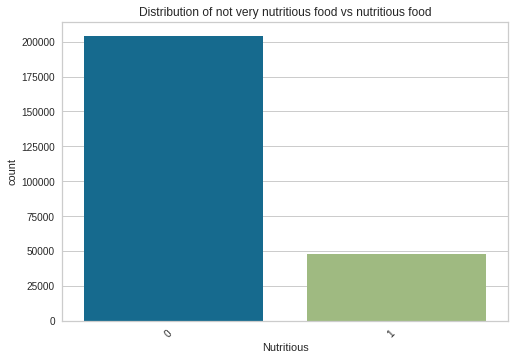

In [ ]:
# use countplot to visulaize how many products come from each country in our dataset
ax = sns.countplot(x="Nutritious", data=nutrition_score_df, order = nutrition_score_df['Nutritious'].value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax = ax.set(title="Distribution of not very nutritious food vs nutritious food")

# **1.4.2.1** Split into Features and Label

The features will be the nutrition factors. The label for regression model will be `nutrition-score-uk_100g` and `nutrition-score-fr_100g`, denoted as `label_uk` and `label_fr`, respectively. The label for logistic model will be `above_average`, denoted as `label_bi`.


In [ ]:
# features are nutrition factors
features = nutrition_score_df[nutrition_columns]
# labels are nutrition scores
label_uk = nutrition_score_df["nutrition-score-uk_100g"]
label_fr = nutrition_score_df["nutrition-score-fr_100g"]
label_bi = nutrition_score_df['Nutritious']

# **1.4.2.2** Split Data into Train and Test

Use scikit-learn's train_test_split function to split data for regression into train and test sets. The split should be 80-20 meaning 80% for training and rest for testing.

This step is for both regression and classification models.

In [ ]:
from sklearn.model_selection import train_test_split
# Conduct 80/20 train-test split with random_state = 42
x_uk_train, x_uk_test, y_uk_train, y_uk_test = train_test_split(features, label_uk, test_size=0.2, random_state=42)
x_fr_train, x_fr_test, y_fr_train, y_fr_test = train_test_split(features, label_fr, test_size=0.2, random_state=42)
x_bi_train, x_bi_test, y_bi_train, y_bi_test = train_test_split(features, label_bi, test_size=0.2, random_state=42)

# **1.4.2.3** PCA to Reduce Dimensionality

**Initial PCA**

As a first step instantiate and fit PCA from scikit-learn on our training set.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# scaler initialize
scaler_uk = StandardScaler()
# fit and transform with train data
x_uk_train_sc = scaler_uk.fit_transform(x_uk_train)
# transform test data
x_uk_test_sc = scaler_uk.transform(x_uk_test)
# fit PCA model
pca_uk = PCA().fit(x_uk_train_sc)
# do the same thing for fr dataset
scaler_fr = StandardScaler()
x_fr_train_sc = scaler_fr.fit_transform(x_fr_train)
x_fr_test_sc = scaler_fr.transform(x_fr_test)
pca_fr = PCA().fit(x_fr_train_sc)
# do the same thing for binary dataset
scaler_bi = StandardScaler()
x_bi_train_sc = scaler_bi.fit_transform(x_bi_train)
x_bi_test_sc = scaler_bi.transform(x_bi_test)
pca_bi = PCA().fit(x_bi_train_sc)

Similar to the previous session, calculate cumulative explained variance ratios for `pca_uk` and `pca_fr` respectively.

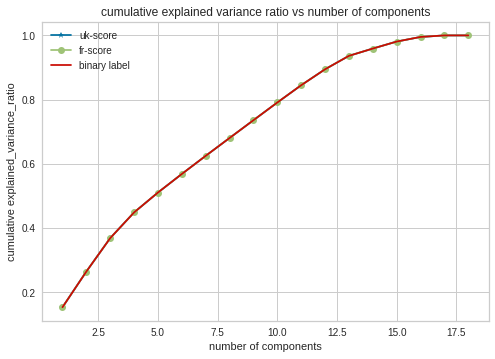

In [ ]:
# Save the explained variance ratios into variable called "explained_variance_ratios"
# Save the CUMULATIVE explained variance ratios into variable called "cum_evr"
explained_variance_ratios_uk = pca_uk.explained_variance_ratio_
cum_evr_uk = explained_variance_ratios_uk.cumsum()
explained_variance_ratios_fr = pca_fr.explained_variance_ratio_
cum_evr_fr = explained_variance_ratios_fr.cumsum()
explained_variance_ratios_bi = pca_bi.explained_variance_ratio_
cum_evr_bi = explained_variance_ratios_bi.cumsum()
# plot figure
plt.plot(range(1, len(cum_evr_uk)+1), cum_evr_uk, '-*', label='uk-score')
plt.plot(range(1, len(cum_evr_fr)+1), cum_evr_fr, '-o', label='fr-score')
plt.plot(range(1, len(cum_evr_fr)+1), cum_evr_bi, label='binary label')
plt.legend()
plt.xlabel("number of components")
plt.ylabel("cumulative explained_variance_ratio")
fig = plt.title("cumulative explained variance ratio vs number of components")

These three lines are almost the same since we split features on the same test dataset.

With threshold of at least 80% of total variance in the dataset, we decided to keep 10 components and transform the test set as `x_uk_test_pca` and `x_fr_test_pca`, and `x_bi_test_pca`.

In [ ]:
# fit and transform data with 10 features for regression models
pca_uk = PCA(n_components=10).fit(x_uk_train_sc)
x_uk_train_pca = pca_uk.transform(x_uk_train_sc)
x_uk_test_pca = pca_uk.transform(x_uk_test_sc)

pca_fr = PCA(n_components=10).fit(x_fr_train_sc)
x_fr_train_pca = pca_fr.transform(x_fr_train_sc)
x_fr_test_pca = pca_fr.transform(x_fr_test_sc)
# for logistic model, keep 10 features
pca_bi = PCA(n_components=10).fit(x_bi_train_sc)
x_bi_train_pca = pca_bi.transform(x_bi_train_sc)
x_bi_test_pca = pca_bi.transform(x_bi_test_sc)

# **Part 2: Machine Learning**

#2.1 Logistic Regression
We first apply the logistic Regression model on the "Nutritious" label that we defined. We will use the date preprocessed in 1.4.2.2

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_bi_train, y_bi_train)
log_predictions = log_model.predict(x_bi_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# We then print out the precision, recall and f-1 score of our model as a measurement of prediction. We reached an average accuracy about 90%.
from sklearn.metrics import classification_report
print(classification_report(y_bi_test, log_predictions))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92     40798
           1       0.66      0.64      0.65      9616

    accuracy                           0.87     50414
   macro avg       0.79      0.78      0.78     50414
weighted avg       0.87      0.87      0.87     50414



We can also use a confusion matrix to describe the performance of our model and a heat map will also help visualize the result.

In [ ]:
from sklearn import metrics
score_log = log_model.score(x_bi_test, y_bi_test)
cm_log = metrics.confusion_matrix(y_bi_test, log_predictions)
print(cm_log)

[[37647  3151]
 [ 3501  6115]]


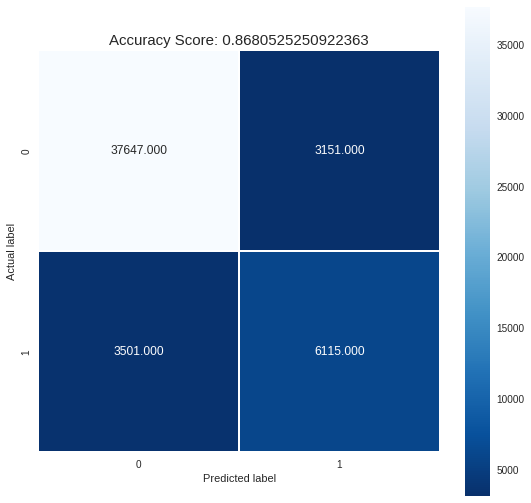

In [ ]:
# plot the heat map based on the confusion matrix.
plt.figure(figsize=(9,9))
sns.heatmap(cm_log, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_log)
plt.title(all_sample_title, size = 15);

Then we use the data after PCA to see if the accuracy increases.

In [ ]:
# Initialize another model
log_model_pca = LogisticRegression()
log_model_pca.fit(x_bi_train_pca, y_bi_train)
log_predictions_pca = log_model_pca.predict(x_bi_test_pca)

In [ ]:
print(classification_report(y_bi_test, log_predictions_pca))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94     40798
           1       0.78      0.62      0.69      9616

    accuracy                           0.89     50414
   macro avg       0.85      0.79      0.81     50414
weighted avg       0.89      0.89      0.89     50414



In [ ]:
score_log_pca = log_model_pca.score(x_bi_test_pca, y_bi_test)
cm_log_pca = metrics.confusion_matrix(y_bi_test, log_predictions_pca)
print(cm_log_pca)

[[39144  1654]
 [ 3668  5948]]


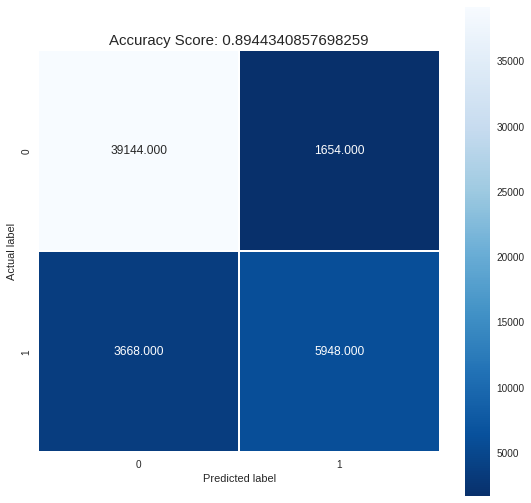

In [ ]:
# plot the heat map based on the confusion matrix.
plt.figure(figsize=(9,9))
sns.heatmap(cm_log_pca, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_log_pca)
plt.title(all_sample_title, size = 15);

We can see that after applying PCA, the overall accuracy of the model increases!

# 2.2 Linear Regression
From logistic regression, we can classify a food as "nutritious" or not compared with other food. But can we further measure the nutritional level of a food ? We then want to predict the nutrition score of food to get a clearer look. We will first try linear regression. 

In [ ]:
# Import the model and fit the data
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.5, fit_intercept=True, copy_X=True, max_iter=10000,tol=1e-6)

model.fit(x_fr_train, y_fr_train)
predictions = model.predict(x_fr_test)

In [ ]:
# calculate the mean absolute error
lr_errors = []
y_fr_test_list = y_fr_test.to_list()
err_num = 0

lr_test = []
lr_prediction = []
toleratedInterval = 4
for i in range(predictions.size):
  #remove the outliers
  if predictions[i] < -100 or predictions[i]>100:
    err_num += 1
    continue
  if abs(round(predictions[i]) - y_fr_test_list[i]) < toleratedInterval:
    lr_errors.append(0)
  else:
    lr_errors.append(abs(round(predictions[i]) - y_fr_test_list[i]))
  lr_test.append(int(y_fr_test_list[i]))
  lr_prediction.append(np.int(predictions[i]))
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(lr_errors), 2), 'degrees.')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Mean Absolute Error: 3.39 degrees.


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print('mean err: %.2f'
      % mean_squared_error(lr_test, lr_prediction))
print('R^2 score: %.2f'
      % r2_score(lr_test, lr_prediction))

mean err: 28.47
R^2 score: 0.65


To get the accuracy, we can caluculate it using the mean average percentage error subtracted from 100%.

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mean_mape = 100 * (np.mean(lr_errors) / np.mean(y_fr_test))
# Calculate accuracy
accuracy = 100 - mean_mape
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 63.17 %.


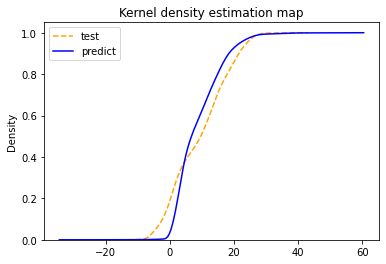

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Through the kernel density estimation map, the distribution characteristics of 
#the data samples themselves can be seen intuitively.
plt.figure()
sns.kdeplot(lr_test,cumulative=True, color='orange', label='test', linestyle = '--', legend=True)
sns.kdeplot(lr_prediction, cumulative=True, color='b', label='predict', legend=True)
plt.title("Kernel density estimation map")
plt.plot(label="test")
plt.legend(loc=0)
plt.plot(legend=True)
plt.show()

By the training and testing process, we have a LASSO regularized linear regression model. We can find that the result of this model isn't good. The possible reasons are as follows.
The independent variables are collinear. The variance inflation factor is too large. We decide to try another model to get a better accuracy.

# **2.3** Random Forest
Since we have a large dataset and interpretability is not a major concern, we can use the Random Forest model to predict the nutrition score of a food based on its nutrition features. We will use the data preprocessed in 1.4.2.2

In [ ]:
# Importing the Random Forest Model, we will first use n_estimator = 100 to see the performance
from sklearn.ensemble import RandomForestRegressor

# Initialize the model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Fit in data from 1.4.2.2
rf.fit(x_uk_train, y_uk_train)

RandomForestRegressor(random_state=42)

Our model has benn trined to learn the relationships between nutrition features and the food score, then we want to evaluate the performance of our model. We used the absolute error because we want to know how far away our prediction is from the actual value and we don't want the errors to cancel out each other.

In [ ]:
# Use the forest's predict method on the test data
rf_predictions = rf.predict(x_uk_test)
# Calculate the absolute errors
rf_errors = abs(rf_predictions - y_uk_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(rf_errors), 2), 'degrees.')

Mean Absolute Error: 0.33 degrees.


To get the accuracy, we can caluculate it using the mean average percentage error subtracted from 100%.

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mean_mape = 100 * (np.mean(rf_errors) / np.mean(y_uk_test))

# Calculate accuracy
accuracy = 100 - mean_mape
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 96.39 %.


We can see that the accuracy is much higher than the linear model.To visualize our random forest model, we can print the decision tree details of the first decision tree (accessed by index 0)

In [ ]:
from sklearn.tree import export_text

print(export_text(rf.estimators_[0], 
                  spacing=3, decimals=3,
                  feature_names=nutrition_columns))

|--- saturated-fat_100g <= 4.535
|   |--- sugars_100g <= 19.875
|   |   |--- salt_100g <= 1.376
|   |   |   |--- saturated-fat_100g <= 1.395
|   |   |   |   |--- fiber_100g <= 2.305
|   |   |   |   |   |--- sodium_100g <= 0.271
|   |   |   |   |   |   |--- proteins_100g <= 6.405
|   |   |   |   |   |   |   |--- fiber_100g <= 1.105
|   |   |   |   |   |   |   |   |--- energy_100g <= 335.500
|   |   |   |   |   |   |   |   |   |--- proteins_100g <= 0.292
|   |   |   |   |   |   |   |   |   |   |--- sugars_100g <= 4.505
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 19
|   |   |   |   |   |   |   |   |   |   |--- sugars_100g >  4.505
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 26
|   |   |   |   |   |   |   |   |   |--- proteins_100g >  0.292
|   |   |   |   |   |   |   |   |   |   |--- salt_100g <= 0.461
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 24
|   |   |   |   |   |   |   |   |   |   |--- salt

# **Part 3: Conclution**

# **3.1** Challenges and Obstacles 
# 3.1.1 Challenges in Data Cleaning
The dataset is pretty large with over 120 columns and more than 330,000 rows. It is sparse at the same time, many of the columns contain a lot of 0 values or null values. The first challenge is how to clean the data without losing too many rows or columns. We solved this problem by dropping unrelevant columns - columns that don't contain nutritional information and drop rows that have too many null values.  

# 3.1.2 Challenges in Modeling
Our first idea is trying to apply unsupervised learning models to group food with similar nutrition distributions and make self-defined categories. However, after applying the K-Means clustering method, we encountered two obstacles. First, the optimal number of cluster is quite small(less than 5) and second, most of the data points were in the same cluster which made the result not very useful. We applied PCA and did data standalization, we also tried out different cluster numbers but the result was still not ideal. We then came to realize that we should turn to supervised learning models.

#3.1.3 Challenges in Supervised Learning
We choose "nutrition score" as our label for supervised learning and since our data features are all numerical, the first model came to our mind is linear regression model. But after applying the model, the accuracy of our prediction is not very good which indicated that the dataset may not follow a linear pattern. Then we faced the challenge of increasing the accuracy of our model and we hope to reach at least 80% accuracy. Since our dataset is large and the feature rows are relatively sparse - many features are frequently 0. We then try to use the random forest model and we found that the model performed quite well and we reached accuracy over 95%.

# **3.2** Potential Next Steps/ Future Direction
The goal of our project is to measure the nutritional level of a food and make recommandations base on it. In the future, we could apply different recommandation algorithms and make recipes. Perhaps we can define other nutrition scores as one of the reference standards for people's intake of food through the distribution and content of food nutrients.